# Data Cleaning

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aashgohil/HR_Data_Science/main/aug_train.csv')

In [8]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [14]:
# Bucketing the company_size values into categorizes
df['size'] = np.where(df['company_size'].isin(['50-99','10-49','<10']), 'Small Company', 'Unknown')
df['size'] = np.where(df['company_size'].isin(['100-500','500-999']), 'Medium Company',df['size'])
df['size'] = np.where(df['company_size'].isin(['10000+','1000-4999','5000-9999']), 'Large Company',df['size'])
sorted_counts=df['size'].value_counts()

In [15]:
df_Clean = df_Clean = df.dropna(subset = ['gender','enrolled_university','education_level','major_discipline','experience','last_new_job'])
df_Clean = df_Clean.fillna('Unknown')

In [17]:
df_Clean['company_size'].replace({'10/49':'10-49'}, inplace=True)

In [19]:
df_Clean.drop(['company_size'], axis=1, inplace=True)
df_Clean.rename(columns={'size': 'company_size'}, inplace=True)

In [20]:
df_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12477 non-null  int64  
 1   city                    12477 non-null  object 
 2   city_development_index  12477 non-null  float64
 3   gender                  12477 non-null  object 
 4   relevent_experience     12477 non-null  object 
 5   enrolled_university     12477 non-null  object 
 6   education_level         12477 non-null  object 
 7   major_discipline        12477 non-null  object 
 8   experience              12477 non-null  object 
 9   company_type            12477 non-null  object 
 10  last_new_job            12477 non-null  object 
 11  training_hours          12477 non-null  int64  
 12  target                  12477 non-null  float64
 13  company_size            12477 non-null  object 
dtypes: float64(2), int64(2), object(10)
me

# EDA Questions

### 1. No Gap/Yes Gap: will the gap years of jobs affect whether a candidate is staying or leaving?

In [33]:
# First see the portion of the duration of job gap
ep = df_Clean['last_new_job'].value_counts().reset_index()
ep.columns = [
    'last_new_job', 
    'percent'
]
ep['percent'] /= len(df)
fig = px.pie(
    ep, 
    names='last_new_job', 
    values='percent', 
    title='Last_new_job', 
    width=800,
    height=500 
)

fig.show()

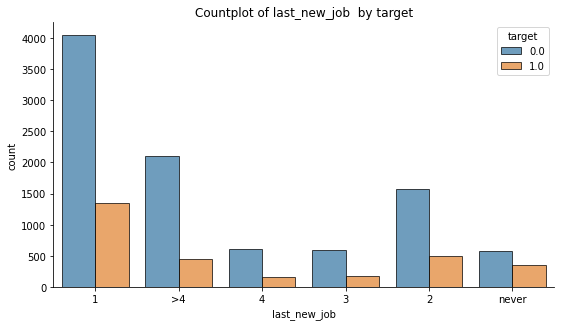

In [34]:
# Then plot the last_new_job towards target to see the difference
plt.figure(figsize=[15,17])
plot=["last_new_job"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

According to these plot, we can easily tell that when the gap year(s) between last and new is(are) 1 or 2, the ratio between leave and stay is 1:3. When the gap duration increases to 3, 4 or even more than 4, the ratio of leave and stay decreases to 1:4. This means if the last job and new job gap turns longer, more candidates tend to stay in this Big Data company correspondingly.

However, when we come to candidates never change their job -- the 'never' group, we can see that the ratio between leave and stay are 1:2, which means least candidates in this group will stay in this company rather than their original ones.

This will give HR a hint: When recruiting candidates to join this program, we can turn to candidates with longer gap beween last job and new one. However, not the ones who never change their job, those may experience nostalgia and don't want any change.

### 2. Is the hiring of Data Scientists impacted by their previous experience?

In [39]:
# Set bins for experience to make the graph clearer
df_Clean['experience'] = np.where(df_Clean['experience'].isin(['<1','1','2','3','4','5']), 'Primary Experience',df_Clean['experience'])
df_Clean['experience'] = np.where(df_Clean['experience'].isin(['6','7','8','9','10']), 'Little Experience',df_Clean['experience'])
df_Clean['experience'] = np.where(df_Clean['experience'].isin(['11','12','13','14','15']), 'Have Experience',df_Clean['experience'])
df_Clean['experience'] = np.where(df_Clean['experience'].isin(['16','17','18','19','20','>20']), 'Many Experience',df_Clean['experience'])

In [40]:
# First see the portion of experiecne
ep = df_Clean['experience'].value_counts().reset_index()
ep.columns = [
    'experience', 
    'percent'
]
ep['percent'] /= len(df_Clean)

fig = px.pie(
    ep, 
    names='experience', 
    values='percent', 
    title='Experience', 
    width=800,
    height=500 
)

fig.show()

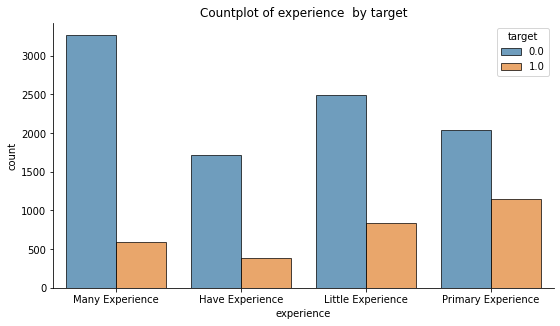

In [41]:
# Then plot different groups by target to see the result
plt.figure(figsize=[15,17])
plot=["experience"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

This graph, from the left hand side to the right, candidates have fewer working experiecne. We can easily tell that group with more experience, candidates tend to stay in Big Data company after training. And this trend is monotonical.

This gives HR the hint -- Candidates with more experience joining this program will tend to stay.

###3. How long should the candidates get trained if the STEM candidates have relevant experience?

In [68]:
# Set new conditions and values to match & save to a new column
condition = [
             (df_Clean['major_discipline'] == 'STEM') & (df_Clean['relevent_experience'] == 'Has relevent experience'),
             (df_Clean['major_discipline'] == 'STEM') & (df_Clean['relevent_experience'] == 'No relevent experience'),
             (df_Clean['major_discipline'] != 'STEM') & (df_Clean['relevent_experience'] == 'Has relevent experience'),
             (df_Clean['major_discipline'] != 'STEM') & (df_Clean['relevent_experience'] == 'No relevent experience')
]

In [69]:
values = ['STEM_rel', 'STEM_nonrel', "Non_STEM_rel", "Non_STEM_nonrel"]

In [73]:
df_Clean['educational condition'] = np.select(condition, values)

In [74]:
df_Clean.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,company_size,newgroup,educational condition
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,Many Experience,Unknown,1,36,1.0,Unknown,STEM_rel,STEM_rel
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,Have Experience,Pvt Ltd,>4,47,0.0,Unknown,STEM_nonrel,STEM_nonrel
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,Many Experience,Funded Startup,4,8,0.0,Unknown,STEM_rel,STEM_rel
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,Have Experience,Pvt Ltd,>4,18,1.0,Unknown,STEM_rel,STEM_rel
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,Little Experience,Pvt Ltd,1,46,1.0,Unknown,STEM_rel,STEM_rel


#### 3.1 Educational Condition by target

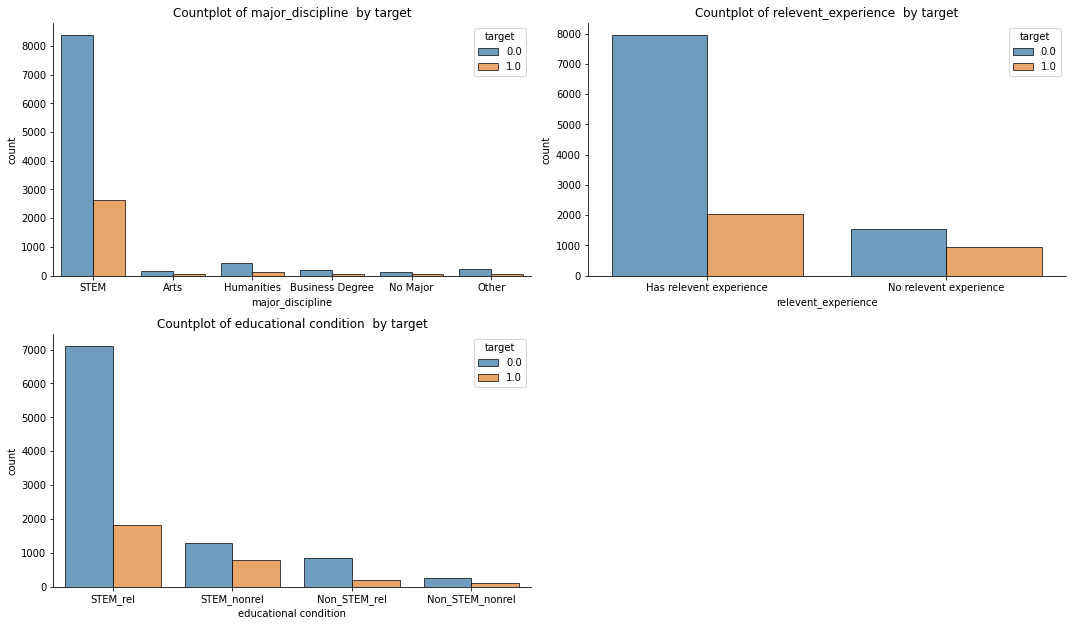

In [81]:
# Plot the educational condition by target to see the different
plt.figure(figsize=[15,17])
plot=["major_discipline", "relevent_experience", "educational condition"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

Through this plot, it is undeniable that candidates with relevent experiecne tend to stay in this company, especially when we compare 'relevent' with 'non_relevent' groups.


#### 3.2 Educational Condition by training hours

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



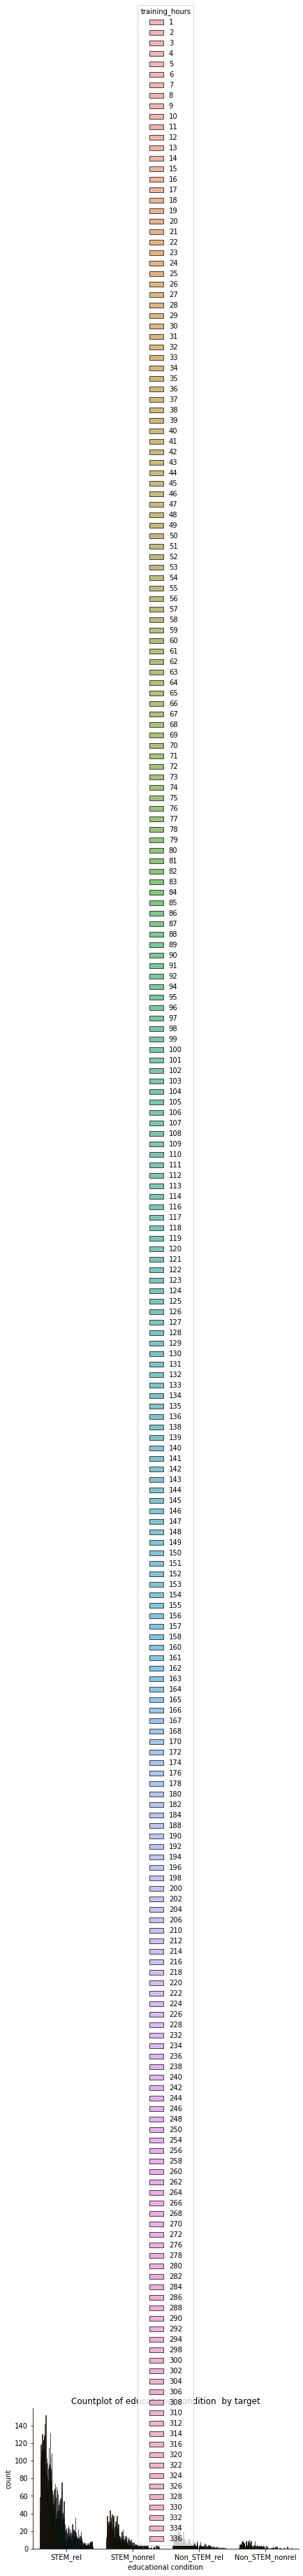

In [79]:
# Plot the educational condition by target to see the different ???
plt.figure(figsize=[15,17])
plot=["educational condition"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='training_hours', edgecolor="black", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()